# GRIP @Spark Foundation Internship

### Author:Peddi Shivani

## Data Science and Business Analytics Intern
#### Task1:Prediction using Supervised Machine Learing
In this task,i will be examining the relationship between the number of studyhours and the percentage of students. The goal is to build a linear regression mocel that can accurately predict the percentage of students based on number of hours they study.

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
data = pd.read_csv(r'C:\Users\peddi\Desktop\grip\dataset\Studentscore.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Data analysis

data.dtypes

Hours     float64
Scores      int64
dtype: object

In [11]:
data.shape

(5, 2)

In [12]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
data.describe()

,Hours,Scores
count,5.000000,5.000000
mean,4.560000,40.000000
std,2.399583,21.817424
min,2.500000,21.000000
25%,3.200000,27.000000
50%,3.500000,30.000000
75%,5.100000,47.000000
max,8.500000,75.000000


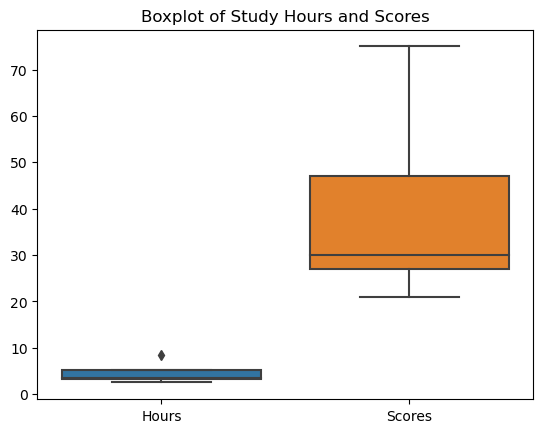

In [14]:
#Identify and Treatment of outliers

sns.boxplot(data=data)
plt.title('Boxplot of Study Hours and Scores')
plt.show()

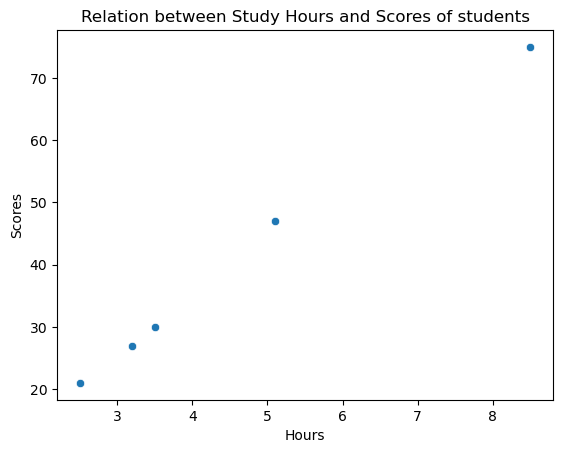

In [15]:
#Checking the correlation

sns.scatterplot(x='Hours',y='Scores',data = data)
plt.title('Relation between Study Hours and Scores of students')
plt.show()

In [16]:
#Correlation matrix

data.corr()              #97% Strong correlation exists

,Hours,Scores
Hours,1.000000,0.998515
Scores,0.998515,1.000000


In [17]:
#Splitting the data

from sklearn.model_selection import train_test_split
x = data.drop(['Scores'], axis = 1)
y = data['Scores']
x_train, x_test,y_train, y_test = train_test_split(x,y,train_size = 0.7, random_state = 189)

In [18]:
#Linear Regression Model Building

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [19]:
#Prediction on train data

y_train_pred = regression.predict(x_train)

In [20]:
#Prediction on test data

y_test_pred = regression.predict(x_test)

#    Model Evaluation

In [21]:
#Accuracy of train data

r_sq = r2_score(y_train, y_train_pred)
r_sq

0.9981213037484993

In [22]:
#Accuracy of test data

r_sq = r2_score(y_test, y_test_pred)
r_sq

0.9689597990019214

In [23]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error :',metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R-2 :',metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error: 3.2916666666666607
Mean Squared Error : 17.879155774893242
Root Mean Squared Error: 4.228375075001417
R-2 : 0.9689597990019214


Text(0.5, 1.0, 'Study Hours and Scores')

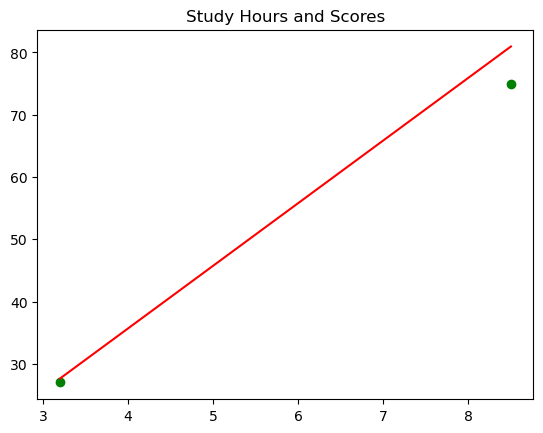

In [24]:
#Visualising the test set results

plt.scatter(x=x_test, y=y_test, color='green')
plt.plot(x_test, regression.predict(x_test), color='red')
plt.title('Study Hours and Scores')

In [25]:
#Getting the final regression Equation

print("regression coefficient :", regression.coef_)
print("regression intercept:", regression.intercept_)

regression coefficient : [10.05813953]
regression intercept: -4.548449612403097


# Equation

Y = 10.04 + (-4.548) * Hours

# Making Live Prediction


# What will be the predicted score if student studies for 9.25hrs/day?

In [26]:
print('The score of the student will be:', regression.predict([[9.25]]))

The score of the student will be: [88.48934109]
